### **Task 1: Web Scraping to Gain Company Insights**  

**Objective**: Scrape and analyze customer reviews related to British Airways to uncover insights about customer sentiments and experiences.  

This task involves using **Python** and the **BeautifulSoup** library to perform web scraping. The process includes:  
- Collecting review data from the [Skytrax](https://www.airlinequality.com/airline-reviews/british-airways) website, specifically focusing on British Airways.  
- Extracting the text data from individual review links.  
- Saving the scraped data into a local **.csv** file for further analysis.  

After collecting the data, the next step is to perform **Sentiment Analysis** to classify the reviews as positive, neutral, or negative. This analysis helps identify key customer sentiments and trends. Insights from the analysis are then presented in a structured format using PowerPoint.  

This Jupyter notebook contains starter code for web scraping and outlines the steps to complete the task.

In [2]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages+1):
    
    print(f'Scraping Page {i}')
    
    url = f'{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}'
    
    response = requests.get(url)
    
    content = response.content
    parsed_content = BeautifulSoup(content,'html.parser')
    for para in parsed_content.find_all('div',{'class':'text_content'}):
        reviews.append(para.get_text())
        
    print(f"   -----> {len(reviews)} total reviews")

Scraping Page 1
   -----> 100 total reviews
Scraping Page 2
   -----> 200 total reviews
Scraping Page 3
   -----> 300 total reviews
Scraping Page 4
   -----> 400 total reviews
Scraping Page 5
   -----> 500 total reviews
Scraping Page 6
   -----> 600 total reviews
Scraping Page 7
   -----> 700 total reviews
Scraping Page 8
   -----> 800 total reviews
Scraping Page 9
   -----> 900 total reviews
Scraping Page 10
   -----> 1000 total reviews


In [4]:
df = pd.DataFrame()
df['reviews'] = reviews
df

,reviews
0,✅ Trip Verified | British Airways is absolute ...
1,✅ Trip Verified | The flight time was changed ...
2,✅ Trip Verified | I'm so fraustrated. My fli...
3,✅ Trip Verified | We have sat on this plane fo...
4,Not Verified | British Airways stranding my w...
...,...
995,✅ Trip Verified | The seating configuration m...
996,✅ Trip Verified | No problems at the airport i...
997,✅ Trip Verified | Malaga to London Heathrow ....
998,✅ Trip Verified | Sydney to Singapore. Extrem...


Removing the parts before | in the reviews columns

In [6]:
df.reviews = df.reviews.str.split("|",expand = True)[1]

In [7]:
df

,reviews
0,British Airways is absolute rubbish. I had to...
1,The flight time was changed at the last minut...
2,I'm so fraustrated. My flight was cancelled...
3,We have sat on this plane for an hour and for...
4,British Airways stranding my wife and I at H...
...,...
995,The seating configuration meant that we were...
996,"No problems at the airport in Vienna, it was ..."
997,Malaga to London Heathrow . A shambolic airl...
998,Sydney to Singapore. Extremely disappointed ...


### Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

### Cleaning the Text

In [10]:
symbols = ['`', '~', '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '-', '+', '=', '{', '[', '}', '}', '|', '\\', ':', ';', '"', "'", '<', ',', '>', '.', '?', '/']

def contains_symbols(review):
    return any(symbol in review for symbol in symbols)

# Apply the function to the 'reviews' column and filter out reviews with symbols
filtered_reviews = df[~df['reviews'].apply(contains_symbols)]

filtered_reviews

,reviews


In [11]:
symbols = ['`', '~', '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '-', '+', '=', '{', '[', '}', '}', '|', '\\', ':', ';', '"', "'", '<', ',', '>', '.', '?', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def clean_text(text):
    return ''.join([char for char in text if char.isalpha() or char.isspace()])

df['clean_reviews'] = df['reviews'].apply(clean_text)

df

,reviews,clean_reviews
0,British Airways is absolute rubbish. I had to...,British Airways is absolute rubbish I had to ...
1,The flight time was changed at the last minut...,The flight time was changed at the last minut...
2,I'm so fraustrated. My flight was cancelled...,Im so fraustrated My flight was cancelled l...
3,We have sat on this plane for an hour and for...,We have sat on this plane for an hour and for...
4,British Airways stranding my wife and I at H...,British Airways stranding my wife and I at H...
...,...,...
995,The seating configuration meant that we were...,The seating configuration meant that we were...
996,"No problems at the airport in Vienna, it was ...",No problems at the airport in Vienna it was e...
997,Malaga to London Heathrow . A shambolic airl...,Malaga to London Heathrow A shambolic airli...
998,Sydney to Singapore. Extremely disappointed ...,Sydney to Singapore Extremely disappointed t...


## Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

In [13]:
import nltk 

nltk.download('punkt')
from nltk.tokenize import word_tokenize

from nltk import pos_tag
nltk.download('stopwords')

from nltk.corpus import stopwords
nltk.download('wordnet')

from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Enrichment – POS tagging AND Stopwords removal

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

In [15]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append((word,pos_dict.get(tag[0])))
            
    return newlist
    
df['POS tagged'] = df["clean_reviews"].apply(token_stop_pos)
df   

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,clean_reviews,POS tagged
0,British Airways is absolute rubbish. I had to...,British Airways is absolute rubbish I had to ...,"[(British, a), (Airways, n), (absolute, a), (r..."
1,The flight time was changed at the last minut...,The flight time was changed at the last minut...,"[(flight, n), (time, n), (changed, v), (last, ..."
2,I'm so fraustrated. My flight was cancelled...,Im so fraustrated My flight was cancelled l...,"[(Im, n), (fraustrated, v), (flight, n), (canc..."
3,We have sat on this plane for an hour and for...,We have sat on this plane for an hour and for...,"[(sat, v), (plane, n), (hour, n), (forty, n), ..."
4,British Airways stranding my wife and I at H...,British Airways stranding my wife and I at H...,"[(British, a), (Airways, n), (stranding, v), (..."
...,...,...,...
995,The seating configuration meant that we were...,The seating configuration meant that we were...,"[(seating, n), (configuration, n), (meant, v),..."
996,"No problems at the airport in Vienna, it was ...",No problems at the airport in Vienna it was e...,"[(problems, n), (airport, n), (Vienna, n), (ea..."
997,Malaga to London Heathrow . A shambolic airl...,Malaga to London Heathrow A shambolic airli...,"[(Malaga, n), (London, n), (Heathrow, n), (sha..."
998,Sydney to Singapore. Extremely disappointed ...,Sydney to Singapore Extremely disappointed t...,"[(Sydney, n), (Singapore, n), (Extremely, r), ..."


In [16]:
token_stop_pos(df.loc[0,'clean_reviews'])

[('British', 'a'),
 ('Airways', 'n'),
 ('absolute', 'a'),
 ('rubbish', 'a'),
 ('fly', 'v'),
 ('Amsterdam', 'n'),
 ('urgent', 'a'),
 ('appointment', 'n'),
 ('flight', 'n'),
 ('cancelled', 'v'),
 ('last', 'a'),
 ('minute', 'n'),
 ('presumably', 'r'),
 ('due', 'a'),
 ('bad', 'a'),
 ('weather', 'n'),
 ('Theyve', 'n'),
 ('kept', 'v'),
 ('us', None),
 ('gate', 'n'),
 ('saying', 'v'),
 ('plane', 'n'),
 ('couldnt', 'n'),
 ('land', 'n'),
 ('literally', 'r'),
 ('every', None),
 ('plane', 'n'),
 ('airport', 'n'),
 ('taking', 'v'),
 ('landing', 'v'),
 ('zero', None),
 ('issues', 'n'),
 ('another', None),
 ('KLM', 'n'),
 ('flight', 'n'),
 ('Amsterdam', 'n'),
 ('scheduled', 'v'),
 ('depart', 'v'),
 ('time', 'n'),
 ('took', 'v'),
 ('time', 'n'),
 ('another', None),
 ('KLM', 'n'),
 ('flight', 'n'),
 ('Amsterdam', 'n'),
 ('later', 'r'),
 ('evening', 'n'),
 ('also', 'r'),
 ('took', 'v'),
 ('without', None),
 ('problems', 'n'),
 ('one', None),
 ('operated', 'v'),
 ('British', 'n'),
 ('Airways', 'n'),
 ('

## Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

In [18]:
#Obtaining the stem words --> Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else: 
            lemma = wordnet_lemmatizer.lemmatize(word, pos = pos)
            lemma_rew = lemma_rew + " "+ lemma
            
    return lemma_rew

df['Lemma'] = df["POS tagged"].apply(lemmatize)
df

,reviews,clean_reviews,POS tagged,Lemma
0,British Airways is absolute rubbish. I had to...,British Airways is absolute rubbish I had to ...,"[(British, a), (Airways, n), (absolute, a), (r...",British Airways absolute rubbish fly Amsterd...
1,The flight time was changed at the last minut...,The flight time was changed at the last minut...,"[(flight, n), (time, n), (changed, v), (last, ...",flight time change last minute without warn ...
2,I'm so fraustrated. My flight was cancelled...,Im so fraustrated My flight was cancelled l...,"[(Im, n), (fraustrated, v), (flight, n), (canc...",Im fraustrated flight cancel last minute was...
3,We have sat on this plane for an hour and for...,We have sat on this plane for an hour and for...,"[(sat, v), (plane, n), (hour, n), (forty, n), ...",sit plane hour forty five minute await takeo...
4,British Airways stranding my wife and I at H...,British Airways stranding my wife and I at H...,"[(British, a), (Airways, n), (stranding, v), (...",British Airways strand wife Heathrow Airport...
...,...,...,...,...
995,The seating configuration meant that we were...,The seating configuration meant that we were...,"[(seating, n), (configuration, n), (meant, v),...",seating configuration mean pack like sardine...
996,"No problems at the airport in Vienna, it was ...",No problems at the airport in Vienna it was e...,"[(problems, n), (airport, n), (Vienna, n), (ea...",problem airport Vienna easy find British Air...
997,Malaga to London Heathrow . A shambolic airl...,Malaga to London Heathrow A shambolic airli...,"[(Malaga, n), (London, n), (Heathrow, n), (sha...",Malaga London Heathrow shambolic airline Rud...
998,Sydney to Singapore. Extremely disappointed ...,Sydney to Singapore Extremely disappointed t...,"[(Sydney, n), (Singapore, n), (Extremely, r), ...",Sydney Singapore Extremely disappointed trip...


In [19]:
df.loc[0,'Lemma']

'  British Airways absolute rubbish fly Amsterdam urgent appointment flight cancel last minute presumably due bad weather Theyve keep us gate say plane couldnt land literally every plane airport take land zero issue another KLM flight Amsterdam schedule depart time take time another KLM flight Amsterdam later evening also take without problem one operate British Airways cancel bad weather Apparently weather bad every plane could land take successfully apart rebook Eurostar next day would still miss important appointment intend go Amsterdam thanks British Airways'

In [20]:
df[['reviews','Lemma']]

,reviews,Lemma
0,British Airways is absolute rubbish. I had to...,British Airways absolute rubbish fly Amsterd...
1,The flight time was changed at the last minut...,flight time change last minute without warn ...
2,I'm so fraustrated. My flight was cancelled...,Im fraustrated flight cancel last minute was...
3,We have sat on this plane for an hour and for...,sit plane hour forty five minute await takeo...
4,British Airways stranding my wife and I at H...,British Airways strand wife Heathrow Airport...
...,...,...
995,The seating configuration meant that we were...,seating configuration mean pack like sardine...
996,"No problems at the airport in Vienna, it was ...",problem airport Vienna easy find British Air...
997,Malaga to London Heathrow . A shambolic airl...,Malaga London Heathrow shambolic airline Rud...
998,Sydney to Singapore. Extremely disappointed ...,Sydney Singapore Extremely disappointed trip...


## Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [22]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
#function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs ['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

#function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return "Positive"
    elif compound < 0 :
        return "Negative"
    else:
        return "Neutral"

df['Analysis']= df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,clean_reviews,POS tagged,Lemma,Sentiment,Analysis
0,British Airways is absolute rubbish. I had to...,British Airways is absolute rubbish I had to ...,"[(British, a), (Airways, n), (absolute, a), (r...",British Airways absolute rubbish fly Amsterd...,-0.6300,Negative
1,The flight time was changed at the last minut...,The flight time was changed at the last minut...,"[(flight, n), (time, n), (changed, v), (last, ...",flight time change last minute without warn ...,0.3391,Neutral
2,I'm so fraustrated. My flight was cancelled...,Im so fraustrated My flight was cancelled l...,"[(Im, n), (fraustrated, v), (flight, n), (canc...",Im fraustrated flight cancel last minute was...,-0.9289,Negative
3,We have sat on this plane for an hour and for...,We have sat on this plane for an hour and for...,"[(sat, v), (plane, n), (hour, n), (forty, n), ...",sit plane hour forty five minute await takeo...,-0.6488,Negative
4,British Airways stranding my wife and I at H...,British Airways stranding my wife and I at H...,"[(British, a), (Airways, n), (stranding, v), (...",British Airways strand wife Heathrow Airport...,-0.5719,Negative


In [58]:
df.to_xlex("sentiment_analysis.csv", index=False)

In [24]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Negative    451
Positive    445
Neutral     104
Name: count, dtype: int64

## Visual Representation

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

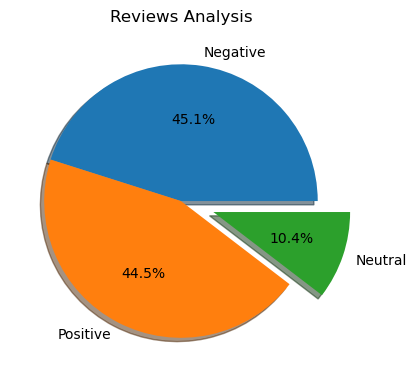

In [27]:
plt.figure(figsize = (15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts, labels = vader_counts.index, explode = (0,0,0.25), autopct= '%1.1f%%', shadow = True);

## Wordcloud

In [29]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.2 kB 469.7 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/301.2 kB 984.6 kB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


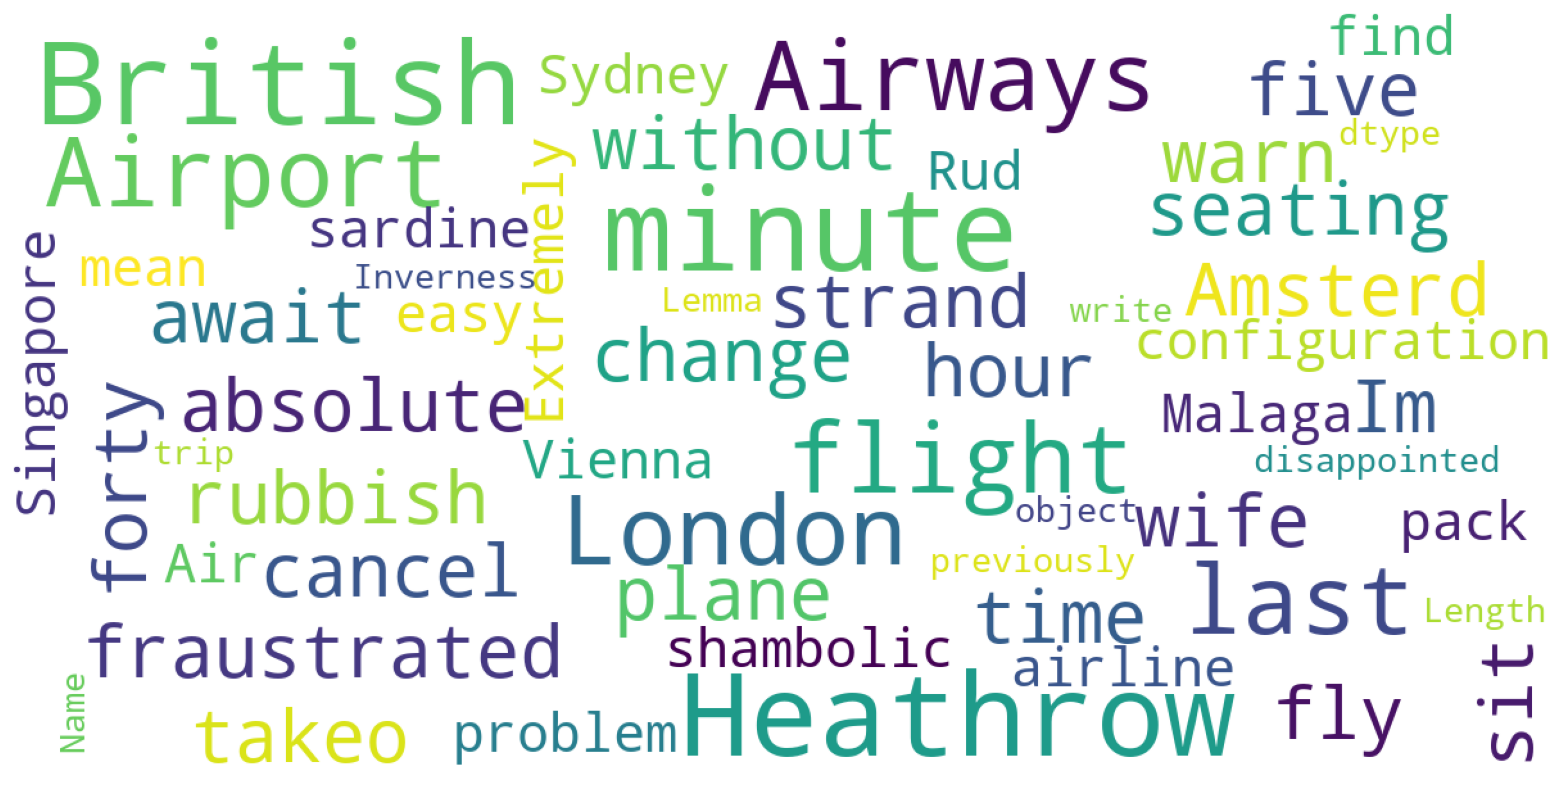

In [30]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(background_color= 'white',
                         stopwords = stopwords,
                         max_words = 100,
                         max_font_size = 30,
                         scale = 3,
                         random_state = 42)
    
    wordcloud = wordcloud.generate(str(data))
    plt.figure(figsize=(30,10))
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df.Lemma)

In [31]:
df.to_csv("BA_reviews.csv")